# Campaña de Marketing Bancario (Solucion)

## Paso 1: Carga del conjunto de datos

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Paso 2: Realiza un EDA completo


#### Exploracion y limpieza de datos

In [2]:
# Obtener dimensiones
total_data.shape

(41188, 21)

Se observa que el DataFrame contiene 41188 registros (cantidad de filas) y 21 variables (cantidad de columnas).

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#valores no nulos
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

De la información anterior, vemos que no tenemos registros NaN y tampoco tenems valores nulos

En cuanto a tipos de datos, tenemos:

- 11 Variables con caracteristicas categoricas ( `contact, day_of_week, default, education, housing,job, loan, marital, month, poutcome, y`)
    
- 10 Variables con caracteristicas numericas (`age, campaign,  cons.conf.idx, cons.price.idx,  duration, emp.var.rate, euribor3m, nr.employed, pdays, previous`)

#### Analisis de variables univariadas

##### Para las variables categoricas

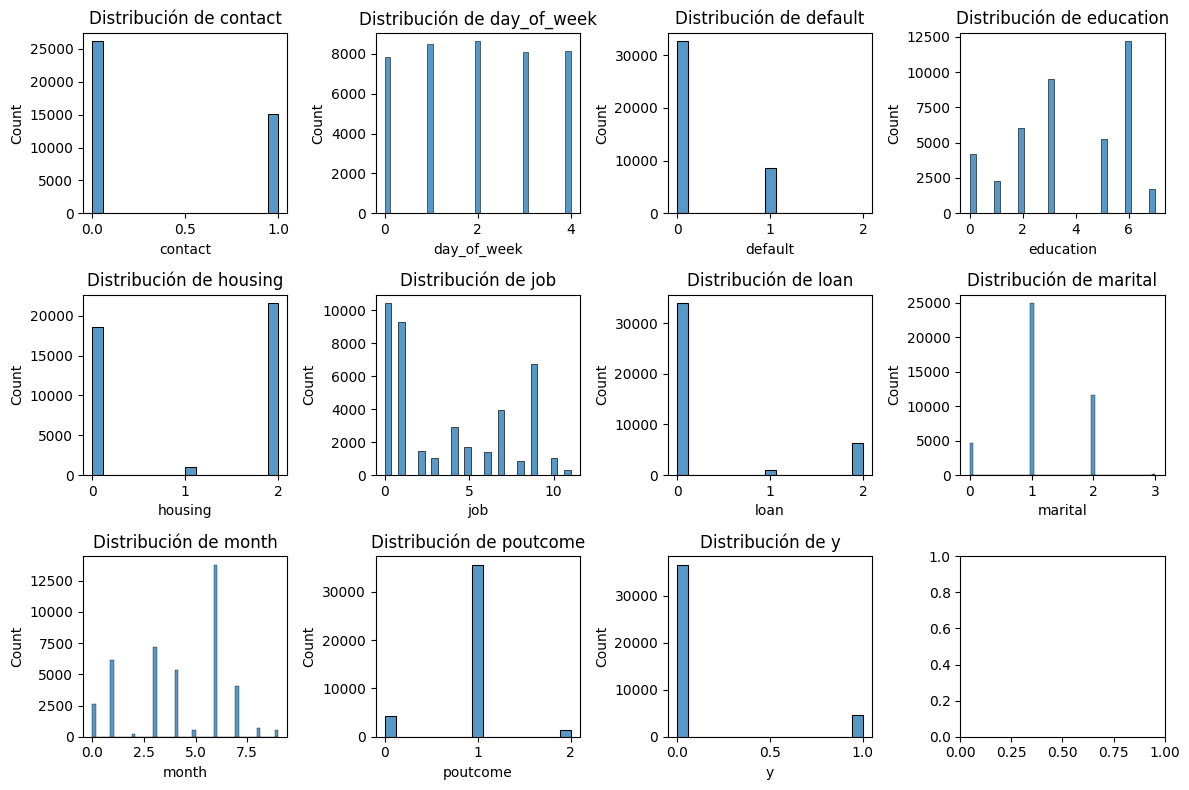

In [18]:
# Definir variables categóricas y transformarlas
categorical_vars = ["contact", "day_of_week", "default", "education", "housing", "job", "loan", "marital", "month", "poutcome", "y"]

# Transformar variables categóricas a numéricas
for col in categorical_vars:
    if total_data[col].dtype == 'object':
        total_data[col] = pd.Categorical(total_data[col]).codes

# Crear la figura y los subplots
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()  # Aplanar el array de ejes para facilitar el acceso

# Crear los histogramas y establecer títulos
for i, col in enumerate(categorical_vars):
    sns.histplot(data=total_data, x=col, ax=axs[i])
    axs[i].set_title(f"Distribución de {col}")

# Ajuste del diseño y mostrar la figura
plt.tight_layout()
plt.show()

Podemos observar lo siguiente en el histograma:

* Tipo de comunicación de la variable contacto (`contact`) las categoria 0 es mayor a la categoria 1.
* Todos los clientes han sido contactado de forma similar (`day_of_week`).
* La mayoria de los clientes no tiene crédito actualmente (categoria 0).
* El nivel de educacion de los clientes (`education`) prevalencen la categoria 6 seguida de la categoria 3.

* Respecto a los prestamos de vivienda (`housing`) las categorias 2 y 0 son representativas y similares resepcto a la categoria 1 que tiene poca presencia.

* Respecto al tipo de trabajo (`job`), la categoria 0, 1 son las que destacan seguidas a las categorias 9 y 7.

* Respecto a los prestamos personales (`loan`), descata la categoria 0.
* Respecto al estado civil (`marital`), destacan las categorias 1 y 2.
* El mes en donde se han contactados los clientes (`month`) con mayor frecuencia ha sido el mes de julio (categoria 6).

* Resultado de la campaña de marketing anterior (`poutcome`) realizada destaca la categoria 1.

* TARGET (El cliente contrata un depósito a largo plazo o no), destaca la categoria 0. 